## Descriptive statistics and hypothesis testing 

#### Importing the required libraries for the project.

In [28]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Reading the dataset in the csv file from the URL

In [30]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [31]:
boston_df=pd.read_csv(boston_url)

### 1st TASK. Becoming familiar with the dataset

The following describes the dataset variables:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per USD 10,000
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in USD 1000's


In [32]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
boston_df.head(5)

The first 5 rows of the dataframe


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### getting information about each variable

In [33]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


#### getting the number of rows and columns - prints as (number of rows, number of columns)

In [34]:
boston_df.shape

(506, 14)

The DataFrame is a dataset with 506 observations (rows) and 14 variables (columns). All variables are numerical, with 13 of them being floating-point numbers and 1 being an integer. 

#### Producing a descriptive statistics table

In [35]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [36]:
missing_values = boston_df.isnull().sum()
print(missing_values)

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64


In [37]:
duplicates = boston_df.duplicated()
print(duplicates.sum())

0


The DataFrame contains no missing values or duplicates, and the data formats are appropriate. We can now proceed with the analysis.

### 2nd Task. Generating Descriptive Statistics and Visualizations

In [40]:
import matplotlib.pyplot as plt 

#### Creating a boxplot for the Median value of owner-occupied homes

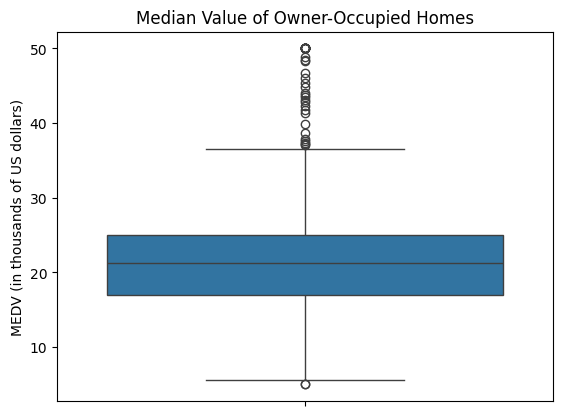

In [45]:
ax = sns.boxplot(y="MEDV", data=boston_df)
plt.ylabel("MEDV (in thousands of US dollars)")
plt.title("Median Value of Owner-Occupied Homes")
plt.show()

The box plot depicts the distribution of the median value of owner-occupied homes, measured in thousands of US dollars.
Central Tendency: The median value of owner-occupied homes appears to be around USD 20,000,000.
Spread: The IQR suggests that the middle 50% of homes have values between approximately USD 18,000,000 and USD 25,000,000.
Outliers: There are several outliers on the higher end of the distribution, indicating homes with significantly higher values.

#### Bar plot for the Charles river variable

In [61]:
# creating dataframe for visualisation and replacing the numerical values (0 and 1) with more descriptive text labels.
CHAS_df = boston_df['CHAS'].replace({0: 'Not Bounded by River', 1: 'Bounded by River'})
value_counts = CHAS_df.value_counts()

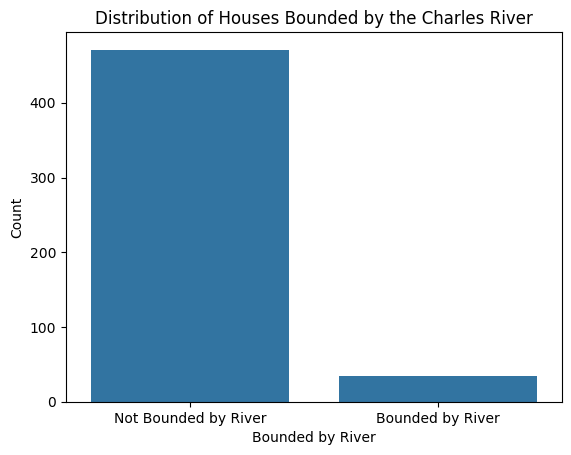

In [62]:
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title('Distribution of Houses Bounded by the Charles River')
plt.xlabel('Bounded by River')
plt.ylabel('Count')
plt.show()

In [60]:
value_counts

CHAS
Not Bounded by River    471
Bounded by River         35
Name: count, dtype: int64

The barplot shows that the majority of the houses ar not bounded by the river (471)

#### Boxplot for the MEDV variable vs the AGE variable

In [66]:
# Dividing the AGE variable into three groups by adding new columns Age_Group
boston_df['Age_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 and Younger', '35-70', '70 and Older'])

In [67]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,35-70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 and Older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,35-70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,35-70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,35-70


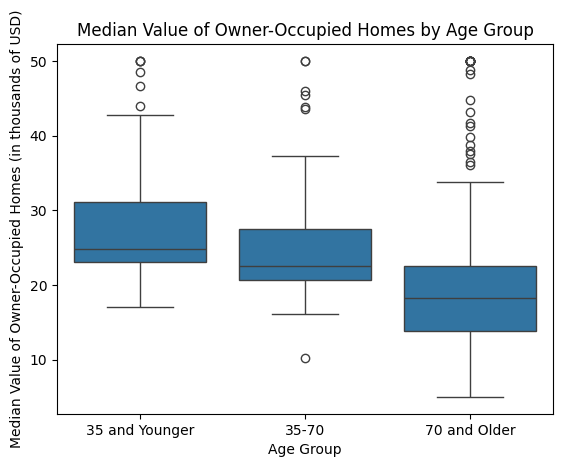

In [71]:
sns.boxplot(x='Age_Group', y='MEDV', data=boston_df)
plt.title('Median Value of Owner-Occupied Homes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Owner-Occupied Homes (in thousands of USD)')
plt.show()


The box plot visually represents the distribution of the median value of owner-occupied homes across three age groups: "35 and Younger," "35-70," and "70 and Older."
The median value for the "35 and Younger" group appears to be the highest, followed by the "35-70" group, and then the "70 and Older" group. This suggests that younger homeowners tend to have higher median home values.
The box plots for the "35 and Younger" and "35-70" groups are wider than the "70 and Older" group, indicating greater variability in home values within these age groups.
There are several outliers, these outliers represent homes with significantly higher values compared to the majority of homes within those age groups.

#### The scatterplot for the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

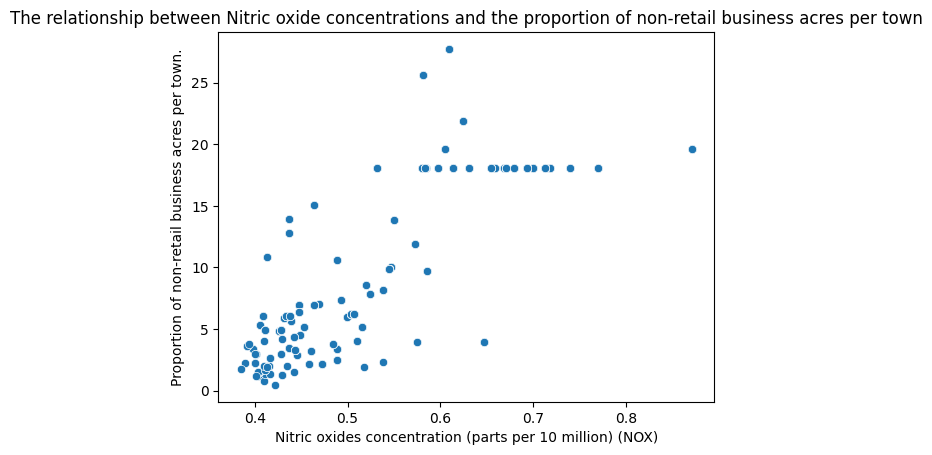

In [79]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('The relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.xlabel('Nitric oxides concentration (parts per 10 million) (NOX)')
plt.ylabel('Proportion of non-retail business acres per town.')
plt.show()

The scatter plot illustrates a positive correlation between nitric oxide concentrations and the proportion of non-retail business acres per town. This means that, generally, as nitric oxide concentrations increase, there is a slight tendency for the proportion of non-retail business acres to also increase. 

#### Histogram for the pupil to teacher ratio variable

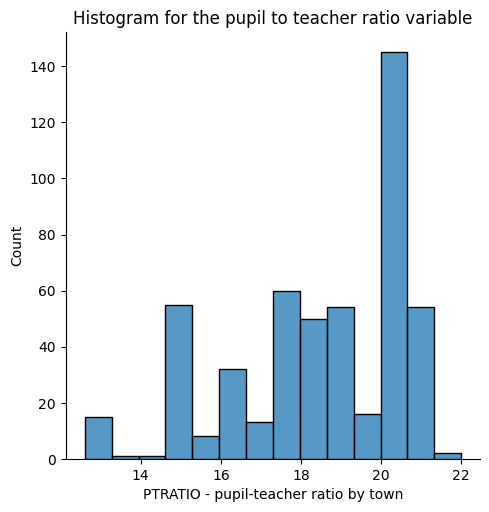

In [81]:
ax = sns.displot(boston_df['PTRATIO'], kde = False)
plt.title('Histogram for the pupil to teacher ratio variable')
plt.xlabel('PTRATIO - pupil-teacher ratio by town')
plt.show()

The histogram displays the distribution of the pupil-teacher ratio (PTRATIO) by town. The right-skewed distribution suggests that a majority of towns have a relatively high pupil-teacher ratio.
The presence of outliers with very low PTRATIOS indicates that some towns might have more favorable teacher-to-student ratios.
Overall, the histogram provides a visual representation of the distribution of pupil-teacher ratios across different towns. It highlights the tendency towards higher ratios and the presence of some towns with lower ratios.

### 3rd Task. Using the appropriate tests to answer the questions provided.

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#### Stating the Hypotheses

- Null Hypothesis (H_0): There is no significant difference in the median value of owner-occupied homes between those bounded by the Charles River and those not bounded by the river.
-  Alternative Hypothesis (H_1): There is a significant difference in the median value of owner-occupied homes between those bounded by the Charles River and those not bounded by the river.

In [98]:
# α = 0.05
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)


TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

<p> p-value: The p-value is significantly less than the commonly used significance level of 0.05. This indicates strong evidence against the null hypothesis.</p>
<p>t-statistic: The positive t-statistic suggests that the mean of the group bounded by the Charles River is significantly higher than the mean of the group not bounded by the river. </p>
<p> Conclusion: We reject the null hypothesis. There is a statistically significant difference in the median value of houses bounded by the Charles River and those not bounded by the river. This suggests that houses located near the Charles River tend to have higher median values.</p>

#### Regression with T-test: 

In [110]:
X = boston_df['CHAS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           7.39e-05
Time:                        19:24:21   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0938      0.418     52.902      0.000      21.273      22.914
CHAS           6.3462      1.588      3.996      0.000       3.226       9.466
==============================================================================
Omnibus:                       81.923   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.534
Skew:                           1.043   Prob(JB):                     5.50e-28
Kurtosis:                       4.267   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in  MEDV - Median value of owner-occupied homes in USD 1000's. The coefficient 6.3462  indicates that, on average, homes bounded by the Charles River (CHAS = 1) are estimated to be USD 6,346 more expensive than homes not bounded by the river, holding all other factors constant.

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

First, the data are groupd into cateries as the one-way ANOVA can't work with continuous variable - a new column for this newly assigned AGE group categories are created:

*   35 years and younger
*   between 35 and 70 years
*   70 years and older

In [103]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

Stating the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

α = 0.05

Test for equality of variance

In [104]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

The p-value is 0.06295337343259205. Since this p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis. This means that there is not enough evidence to conclude that the variances of the three age groups are significantly different.   
Therefore, we can assume that the variances are approximately equal, which is an important assumption for many statistical tests, including the ANOVA test.

First, separate the three samples (one for each job category) into a variable each.

In [105]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

Running a one-way ANOVA.

In [106]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Since the p-value is much smaller than the significance level of 0.05, we reject the null hypothesis. This means that there is a significant difference in the mean median value of owner-occupied homes among the three age groups.

#### Regression with ANOVA

In [112]:
lm = ols('MEDV ~ age_group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df        sum_sq      mean_sq         F        PR(>F)
age_group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


Conclusion: We can also see the same values for ANOVA like before and we will reject the null hypothesis since the p-value is less than 0.05 there is significant evidence that at least one of the means differ.

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis:

 - Null Hypothesis (H_0): There is no linear correlation between Nitric Oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

- Alternative Hypothesis (H_1): There is a linear correlation between Nitric Oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

Significance level:
alpha = 0.05

##### Calculating the Pearson correlation coefficient and p-value

In [115]:
corr_coef, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Pearson correlation coefficient:", corr_coef)
print("p-value:", p_value)


Pearson correlation coefficient: 0.7636514469209192
p-value: 7.913361061210442e-98


Pearson Correlation Coefficient (0.7636514469209192): This indicates a strong positive linear relationship between Nitric Oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS). 

p-value (7.913361061210442e-98): This extremely small p-value is significantly less than the common significance level of 0.05. This means that the observed correlation is highly unlikely to have occurred by chance. 

The null hypothesis is rejected as there is a significant linear correlation between NOX and INDUS.


#### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Stating Hypothesis:

- Null Hypothesis (H_0): There is no significant linear relationship between the weighted distance to five Boston employment centers (DIS) and the median value of owner-occupied homes (MEDV).
- Alternative Hypothesis (H_1): There is a significant linear relationship between the weighted distance to five Boston employment centers (DIS) and the median value of owner-occupied homes (MEDV).

Significance level:
alpha = 0.05

In [116]:
X = boston_df[['DIS']]  
X = sm.add_constant(X) 
y = boston_df['MEDV']  

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        20:01:49   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Results: 
R-squared: 0.062 This indicates that only 6.2% of the variation in MEDV can be explained by the DIS variable. This is a relatively low value

F-statistic and p-value: The F-statistic (33.58) and its associated p-value (1.21e-08) suggest that the overall model is statistically significant.

Coefficient for DIS  1.0916. This means that, on average, for every one-unit increase in the weighted distance to employment centers, the median value of owner-occupied homes increases by approximately USD 1,091.60, holding all other factors constant.

Statistical Significance: The p-value for the DIS coefficient is 0.000, which is much smaller than the significance level of 0.05. This suggests that the effect of distance on home prices is statistically significant. 

##### The null hypothesis is rejected: Given the p-value associated with the coefficient for DIS is significantly less than the 0.05 significance level, we can conclude that there is a statistically significant linear relationship between the weighted distance to five Boston employment centers (DIS) and the median value of owner-occupied homes (MEDV).

